In [ ]:
from rok_launcher import NoxManager

import OCRHelper as OH
import datetime
import glob

config = {
    'nox_size' : (720, 1280)
}

In [ ]:
OH.load_id2name('hi')

# 이미지 서치 병렬처리

In [ ]:
from util import get_screen
from configs import *
import matplotlib.pyplot as plt
import cv2

In [ ]:
from multiprocessing import Process, Queue

In [ ]:
manager = NoxManager(config=config, verbose=False)

In [ ]:
screen = get_screen(manager.sct, manager.nox_monitor)

In [ ]:
plt.imshow(screen)

In [ ]:
def find_img_pos(screen, img, dist=None, interval=5, verbose=False):
    H, W = screen.shape[0:2]
    h, w = img.shape[0:2]
    min_diff = 10000
    pos = np.array([0,0])
    all_pixel_num = (H-h+1)*(W-w+1)
    
    result = Queue()
    
    th1 = Process(target=find_img_pos_multi, args=(screen, img, 0, W//2, result, dist, interval, verbose))
    th2 = Process(target=find_img_pos_multi, args=(screen, img, W//2, W, result, dist, interval, verbose))
    
    th1.start()
    th2.start()
    th1.join()
    th2.join()
    
    # result.put('STOP')
    r1 = result.get()
    r2 = result.get()
    
    pos, min_diff = min(r1,r2, key=lambda x : x[1])

    return pos, min_diff

In [ ]:
def find_img_pos_multi(screen, img, W_start, W_end, result, dist=None, interval=5, verbose=False):
    H = screen.shape[0]
    W = W_end
    h, w = img.shape[0:2]
    min_diff = 10000
    pos = np.array([0,0])
    all_pixel_num = (H-h+1)*(W-w+1 - W_start)
    for i in range(0, H-h+1, interval):
        for j in range(W_start, W-w+1, interval):
            image_diff = get_image_difference(img, screen[i:i+h, j:j+w])
            if min_diff > image_diff:
                min_diff = image_diff
                pos = np.array([i, j], dtype=np.int32)

            if verbose:
                current_pixel_num = i*(W-w)+j
                # sys.stdout.write('\ron scanning... {:.2f}%'.format(current_pixel_num/all_pixel_num*100))
                print('\ron scanning... {:.2f}%'.format(
                    current_pixel_num/all_pixel_num*100), end='')
                
    result.put((pos, min_diff))
    return

In [ ]:
img = cv2.imread(img_dict['7menus'])

In [ ]:
find_img_pos(screen, img)

In [ ]:
result = Queue()
th1 = Process(target=find_img_pos_multi, args=(screen, img, 0, 1000, result))

In [ ]:
th1.start()

In [ ]:
th1 = Process(target=find_img_pos_multi)

In [ ]:
from multiprocessing import Process, Queue

In [ ]:
def work(id, start, end, result):
    total = 0
    for i in range(start, end):
        total += i
        print(i)
    result.put(total)
    return

START, END = 0, 10
result = Queue()
th1 = Process(target=work, args=(1, START, END//2, result))
th2 = Process(target=work, args=(2, END//2, END, result))

th1.start()
th2.start()

result.put('STOP')
total = 0
while True:
    tmp = result.get()
    if tmp == 'STOP':
        break
    else:
        total += tmp
print(f"Result: {total}")

th1.join()
th2.join()

In [ ]:
work(1, 0, 10, result)

In [ ]:
result.get()

In [ ]:
print(q.get())    # prints "[42, None, 'hello']"

In [ ]:
p.join()

# 이건 됨

In [ ]:
from multiprocessing import Process, Queue
from f import f

In [ ]:
q = Queue()
p = Process(target=f, args=(q,))
p.start()

In [ ]:
print(q.get())   

In [ ]:
p.join()

# 가즈아!!

In [8]:
from rok_launcher import NoxManager

import OCRHelper as OH
import datetime
import glob

config = {
    'nox_size' : (720, 1280)
}

from util import get_screen
from configs import *
import matplotlib.pyplot as plt
import cv2

from multiprocessing import Process, Queue

-------------------------------------
Run Nox Application and Press Any Key
Now Find Nox Position


Refining Nox Position


Finished


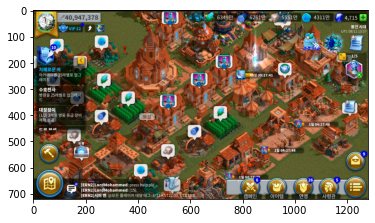

In [9]:
manager = NoxManager(config=config, verbose=False)

In [10]:
from f import find_img_pos_multi, find_img_pos_single

In [11]:
def find_img_pos(screen, img, dist=None, interval=5, verbose=False):
    H, W = screen.shape[0:2]
    h, w = img.shape[0:2]
    min_diff = 10000
    pos = np.array([0,0])
    all_pixel_num = (H-h+1)*(W-w+1)
    
    result = Queue()
    
    th1 = Process(target=find_img_pos_multi, args=(screen, img, 0, W//2, result, dist, interval, verbose))
    th2 = Process(target=find_img_pos_multi, args=(screen, img, W//2, W, result, dist, interval, verbose))
    
    th1.start()
    th2.start()
    
    # result.put('STOP')
    r1 = result.get()
    r2 = result.get()
    
    th1.join()
    th2.join()
    
    result.close()
    result.join_thread()
    
    pos, min_diff = min(r1,r2, key=lambda x : x[1])

    return pos, min_diff, r1, r2

In [12]:
import time

In [13]:
time.time()

1597154236.9971511

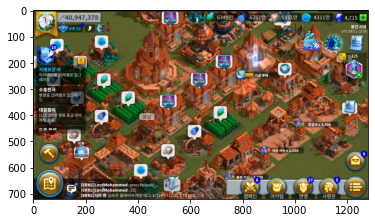

In [23]:
screen = get_screen(manager.sct, manager.nox_monitor)
plt.imshow(screen)

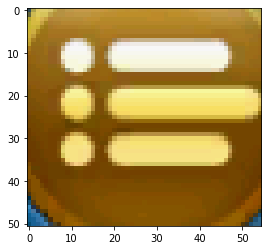

In [24]:
img = cv2.imread(img_dict['menu'])
plt.imshow(img)

In [25]:
s = time.time()
print(find_img_pos(screen, img, dist=None, interval=5, verbose=False))
print(time.time() - s)

(array([ 650, 1205]), 0.010666166132462017, (array([210, 525]), 0.20187135329656128), (array([ 650, 1205]), 0.010666166132462017))
1.4798696041107178


In [26]:
s = time.time()
print(find_img_pos_single(screen, img, dist=None, interval=5, verbose=False))
print(time.time() - s)

(array([ 650, 1205]), 0.010666166132462017)
1.741689920425415


In [ ]:
manager.get_relative_mouse_pos()